In [1]:
import cv2
import numpy as np
img = cv2.imread("./data/car/car_0001.jpg")
print(type(img))
edges = cv2.Canny(img,210,50)
#cv2.imshow("Canny Image",edges)
edges_data = np.asarray(edges)
print(edges_data)


cv2.waitKey(0)

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


-1

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import random
from PIL import Image, ImageOps, ImageEnhance, ImageFilter

In [3]:
#Loading images
np.random.seed(42)
random.seed(42)         
             
lis_folders = os.listdir("./data")
canny_output = []
# print(lis_folders)
train_images = []
for folder in lis_folders[:2]:
    images = os.listdir('./data/'+folder)[:3]
    for image in images:
        img = Image.open("./data/"+folder+"/"+image)
        img = img.convert("L")
        
        img_arr = np.array(img)
        train_images.append(img_arr)
        #canny_output.extend(np.asarray(img.filter(ImageFilter.FIND_EDGES))[:-1, :-1].flatten())
        canny_output.extend(cv2.Canny(np.array(img_arr),210,50)[1:,1:].flatten())
        #out = img.filter(ImageFilter.FIND_EDGES)
        
        
        img_rot = img.rotate(np.random.randint(1, 360))
        #canny_output.extend(np.asarray(img_rot.filter(ImageFilter.FIND_EDGES))[:-1, :-1].flatten())
        canny_output.extend(cv2.Canny(np.array(img_rot),210,50)[1:,1:].flatten())
        train_images.append(np.array(img_rot))
        
        
        s = np.random.randint(1, 4)
        x = s*(np.array(img).shape[0])
        y = s*(np.array(img).shape[1])
        img_sc = img.resize((x,y))
        #canny_output.extend(np.asarray(img_sc.filter(ImageFilter.FIND_EDGES))[:-1, :-1].flatten())
        canny_output.extend(cv2.Canny(np.array(img_sc),210,50)[1:,1:].flatten())
        train_images.append(np.array(img_sc))
        
        
        enhancer = ImageEnhance.Brightness(img)
        img_br = enhancer.enhance(random.random()*3)
        #canny_output.extend(np.asarray(img_br.filter(ImageFilter.FIND_EDGES))[:-1, :-1].flatten())
        canny_output.extend(cv2.Canny(np.array(img_br),210,50)[1:,1:].flatten())
        train_images.append(np.array(img_br))
        


In [4]:
#features extraction
features = []
for image in train_images:
    r, c = image.shape 
    for i in range(r-1):
        for j in range(c-1):
            d_list = []
            d_list.append(image[i, j+1]-image[i, j])
            d_list.append(image[i+1, j]-image[i, j])
            d_list.append(image[i+1, j+1]-image[i, j])
            features.append(d_list)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [5]:
print(len(features))
print(len(canny_output))

972534
972534


In [6]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [7]:
import pandas as pd
df = pd.DataFrame(data=features,columns=["dx","dy","dz"])
#df['Canny'] = [i/255 for i in canny_output]
df['Canny'] = canny_output

In [8]:
df.head(50)

,dx,dy,dz,Canny
0,0,254,255,0
1,1,255,0,0
2,0,255,255,0
3,255,255,255,0
4,0,0,0,0
5,255,0,0,0
6,0,1,2,0
7,0,2,1,0
8,255,1,2,0
9,0,3,3,0


In [9]:
def BT19ECE068_dataset_div_shuffle(df,train): 
    import pandas as pd
    import numpy as np
    #20
    np.random.seed(20)
    df = df.iloc[np.random.permutation(len(df))]
    train_rows = int(train*len(df))
    test_rows = len(df)-train_rows
    train_data = df.iloc[:train_rows+1]
    test_data = df.iloc[train_rows+1:]
    return np.array(train_data),np.array(test_data)

In [10]:
train, test = BT19ECE068_dataset_div_shuffle(df,0.8)
validation, test = BT19ECE068_dataset_div_shuffle(pd.DataFrame(data=test), 0.5)

In [11]:
X_train = train[:, :3]
Y_train = train[:, -1]
X_validation = validation[:, :3]
Y_validation = validation[:, -1]
X_test = test[:, :3]
Y_test = test[:, -1]

In [12]:
print(X_train.shape, X_test.shape, X_validation.shape)

(778028, 3) (97252, 3) (97254, 3)


In [13]:
model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[3]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid'),
])

In [14]:
model.compile(loss="mse",
              optimizer="adam",
             metrics=["accuracy"])

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.fit(
    X_train, Y_train,
    validation_data=(X_validation, Y_validation),
    batch_size=1000,
    epochs=10,
    verbose=0, 
    callbacks=[callback]# suppress output since we'll plot the curves
)

In [16]:
predictions = model.predict(X_test)


3040/3040 [==============================] - 9s 3ms/step


In [17]:
def feature_extracter(img):
    features_list = []
    r, c = img.shape
    for i in range(r-1):
        for j in range(c-1):
            d_list = []
            d_list.append(img[i, j+1]-img[i, j])
            d_list.append(img[i+1, j]-img[i, j])
            d_list.append(img[i+1, j+1]-img[i, j])
            features_list.append(d_list)
    return features_list

In [26]:
def classifier(predictions):
    predictions[predictions > 0.1] = 255
    predictions[predictions < 0.1] = 0.0
    return predictions

   1/1055 [..............................] - ETA: 1:10

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


1055/1055 [==============================] - 3s 3ms/step


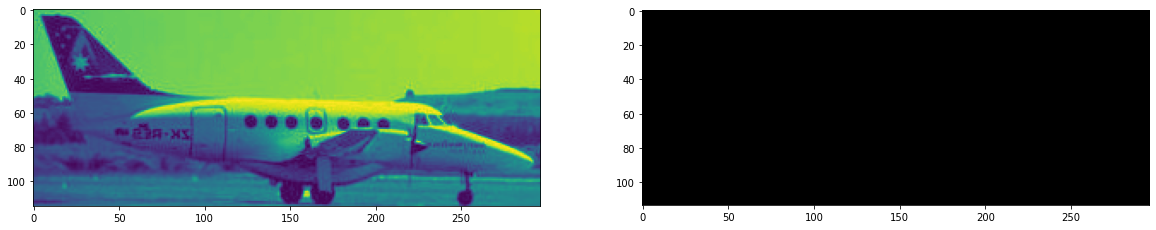

In [27]:
img = Image.open("./data/airplane/airplane_0010.jpg")
img = ImageOps.grayscale(img)
plt.figure(figsize=(20, 25))
plt.subplot(121)
plt.imshow(img)
#img.show()
img = np.array(img)

fl = np.array(feature_extracter(img))
predictions = model.predict(fl)

r, c = img.shape
predictions = predictions.reshape((r-1, c-1))
pred = Image.fromarray(predictions)
plt.subplot(122)
plt.imshow(pred, cmap='gray')
#pred.show()

[[0.999894   0.9998824  0.9999759  ... 0.99985904 0.9998563  0.99998343]
 [0.99997634 0.99998313 0.9999786  ... 0.9999804  0.9999853  0.9999853 ]
 [0.9999769  0.99991167 0.9999453  ... 0.9998563  0.9999853  0.99998343]
 ...
 [0.99998283 0.9999829  0.99998474 ... 0.9999852  0.9999834  0.9999852 ]
 [0.99997735 0.9999552  0.9999638  ... 0.9999834  0.9999853  0.9999852 ]
 [0.999977   0.9999698  0.9999694  ... 0.99998325 0.9999833  0.9999833 ]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


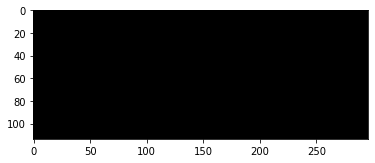

In [28]:
pred = np.array(pred)
print(pred)
pred = classifier(pred)
#print(np.sum(pred[pred>200]))
print(pred)
plt.imshow(pred, cmap='gray')

In [21]:
np.random.randint(1, 360)

158

In [22]:
li = [1, 2, 3, 4]/2
print(li)
li.extend(np.array([1, 2, 3]))
li

TypeError: unsupported operand type(s) for /: 'list' and 'int'